<a href="https://colab.research.google.com/github/Muralimekala/pythontrain/blob/master/Multiple_Linear_Regression_Height_Weight_URL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
url = 'https://raw.githubusercontent.com/Muralimekala/pythontrain/master/weight-height.csv'
df = pd.read_csv(url) ## Read the csv file and assign it to pandas dataframe 
#'C:\\Users\\ASUS\\Desktop\\PythonFiles\\DataFiles\\weight-height.csv'
df.head() ## Print the dataset

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


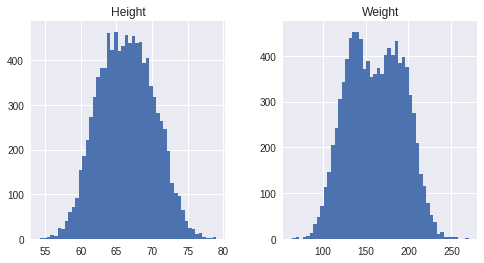

In [4]:
#Distribution of numerical variables
df.hist(bins=50, figsize=(8,4))
plt.show()

In [5]:
### Convert Non Numerical Categorical column into numeric ones
##Check the categories which are non numerical

categoryList = list(df.select_dtypes(include=['object']).columns) ## 'object' type means catgeorical variables
print(categoryList)
print("\n")

['Gender']




In [6]:
## Create dummy variables for non numerical categorical variables
dummies = pd.get_dummies(df[categoryList], prefix= categoryList)
print(dummies.head())
print("\n")

   Gender_Female  Gender_Male
0              0            1
1              0            1
2              0            1
3              0            1
4              0            1




In [7]:
df.drop(categoryList, axis=1, inplace = True) ## Drop Non numerical categorical columns
print(df.head())
print("\n")

      Height      Weight
0  73.847017  241.893563
1  68.781904  162.310473
2  74.110105  212.740856
3  71.730978  220.042470
4  69.881796  206.349801




In [8]:
df=pd.concat([df,dummies], axis =1 ) ## added encoded categorical columns
df.head()

,Height,Weight,Gender_Female,Gender_Male
0,73.847017,241.893563,0,1
1,68.781904,162.310473,0,1
2,74.110105,212.740856,0,1
3,71.730978,220.042470,0,1
4,69.881796,206.349801,0,1


In [9]:
X = df.drop(['Weight'], axis=1)
y = df.Weight

X.head()

,Height,Gender_Female,Gender_Male
0,73.847017,0,1
1,68.781904,0,1
2,74.110105,0,1
3,71.730978,0,1
4,69.881796,0,1


In [10]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train[0:5])

         Height  Gender_Female  Gender_Male
7389  59.368139              1            0
9275  63.916578              1            0
2995  73.075345              0            1
5316  62.426961              1            0
356   70.490929              0            1


In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) ## fitted training data for the algorithm to find the pattern


#r2_mc=regressor.score(X_train,y_train)

# Intercept ## Mean value of Y when X=0 [constant=when all independent variables are zero]
print("Intercept:",regressor.intercept_)

# Co-Efficient of each Variable
print("Regression Coeff:",regressor.coef_) 

Intercept: -234.27302197425766
Regression Coeff: [ 5.96260976 -9.71190845  9.71190845]


In [13]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)
print("\n")
print(y_test)

[141.93828842 176.55658781 219.77836195 ... 149.97129636 166.83374903
 138.87940678]


9394    138.085796
898     187.363366
2398    216.533191
5906    131.761443
2343    157.718438
8225     98.516079
5506    149.631949
6451    133.515492
2670    188.053333
3497    210.198845
1087    220.273901
1819    216.713478
2308    168.982092
6084    112.043944
3724    186.492898
3184    187.120945
6387    146.229436
3728    168.519763
2702    161.889769
7883    144.226987
2930    216.056503
5988    125.401720
4890    169.405619
6718    148.638806
5423    179.727325
3213    194.867543
3017    196.473754
382     189.893342
4237    187.725678
4721    240.440816
           ...    
9236    136.050338
1255    163.633597
3445    191.703763
5859    142.971914
5450    120.545153
5299    124.667940
1712    190.522037
7920    118.821493
5194    134.395979
1578    181.377015
4943    203.978418
3975    210.054856
7134    152.809403
5760    128.037235
5276    128.148813
8556    137.103401
1624    169.611562
4

In [14]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## Higher the Explained Variance Score, the better the model is:
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred)*100)
## 94.6% of the variance or variability of the data is explained by the model

MAE: 7.955916525326744
MSE: 97.87152220196162
RMSE: 9.893003699684016
Explained Variance Score: 90.52916399111471


In [15]:
from sklearn.metrics import r2_score 
print('r2:',r2_score(y_test, y_pred)) 
## Closer to 1 means better prediction. r2 indicates the closeness to regression line to actual line

adj_r2=1 - float(len(y_test)-1)/(len(y_test)-len(regressor.coef_)-1)*(1 - metrics.r2_score(y_test,y_pred))
print("adj_r2=",adj_r2) 
##Closer to 1 the better the prediction. However, it punishes if unnecessary variables are added. 

r2: 0.9052889824534557
adj_r2= 0.9051466312246783


In [16]:
from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='neg_median_absolute_error') 
print ("Cross Val Mean Absolute Error",regression_avg.mean())

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='explained_variance') 
print ("Cross Val Explained Variance:",regression_avg.mean()*100)

Cross Val Mean Absolute Error -6.823393412058401
Cross Val Explained Variance: 90.18174389179362


In [17]:
print("Model Performance Test: In terms of Error")

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## Higher the Explained Variance Score, the better the model is:
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred)*100)
## 95.9% of the variance is explained by the model

print("\n")

print("Model Performance Test: In terms of Cross validation : BIAS VARIANCE TEST")

from sklearn.model_selection import cross_val_score 
regression_avg_mae = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='neg_mean_absolute_error') 
print ("Cross val Mean Abs Error:",regression_avg_mae.mean())

from sklearn.model_selection import cross_val_score 
regression_avg_ev = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='explained_variance') 
print ("Cross Val Explained Variance:",regression_avg_ev.mean()*100)

print("Standard_Dev for Explained Variance=",regression_avg_ev.std()*100)
print("Standard_Dev for Mean Abs Error=",regression_avg_mae.std()*100)

print("Model Performance Test: Bias-Variance")


r2_mc_train=regressor.score(X_train,y_train)
print("Training_r2=",r2_mc_train)


r2_mc_test=regressor.score(X_test,y_test)

print("Test_r2=",r2_mc_test)




print("\n")

print("\n")



print("Model Performance Test: In terms of r2")


from sklearn.metrics import r2_score 
print('r2:',r2_score(y_test, y_pred)) ## Closer to 1 means better prediction

adj_r2=1 - float(len(y_test)-1)/(len(y_test)-len(regressor.coef_)-1)*(1 - metrics.r2_score(y_test,y_pred))
print("adj_r2=",adj_r2) ##Closer to 1 the better the prediction


print("\n")



print("Model Performance Test: MultiCollinearity")

## Do a multicollinearity test
vif_train=1/(1-r2_mc_train) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Train:",vif_train)

vif_test=1/(1-r2_mc_test) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Test:",vif_test)




Model Performance Test: In terms of Error
MAE: 7.955916525326744
MSE: 97.87152220196162
RMSE: 9.893003699684016
Explained Variance Score: 90.52916399111471


Model Performance Test: In terms of Cross validation : BIAS VARIANCE TEST
Cross val Mean Abs Error: -8.003636890396415
Cross Val Explained Variance: 90.18174389179362
Standard_Dev for Explained Variance= 0.6661331064217353
Standard_Dev for Mean Abs Error= 21.699340087218168
Model Performance Test: Bias-Variance
Training_r2= 0.9021035919691243
Test_r2= 0.9052889824534557




Model Performance Test: In terms of r2
r2: 0.9052889824534557
adj_r2= 0.9051466312246783


Model Performance Test: MultiCollinearity
VIF Train: 10.21487938234269
VIF Test: 10.558433706074004


Regression Coeff: [ 5.96260976 -9.71190845  9.71190845]
